# Import Libraries and Load Dataset

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/Volumes/HDD/Dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Data Cleansing

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3297,9194-GFVOI,Female,0,Yes,No,42,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),84.35,3571.6,No
4272,1043-YCUTE,Male,0,Yes,No,56,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),25.15,1327.15,Yes
1486,5208-HFSBT,Female,0,No,No,2,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.05,102.75,Yes
332,2379-GYFLQ,Male,0,No,No,46,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,No,One year,Yes,Credit card (automatic),94.90,4422.95,No
3172,8393-DLHGA,Male,0,No,Yes,25,Yes,No,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.90,2448.75,Yes


Observation:
* `tenure`, `MonthlyCharges`, and `TotalCharges`	 columns are numeric.
* `SeniorCitizen` is apparently a binary (0,1)
* Other columns appear to be object/nominal data that has contain 2 or more than 2 values (Female/Male, Yes/No/other, others).
* Column name for `customerID`, `gender` and `tenure` will be changed into proper case.

In [7]:
df = df.rename(columns={"customerID": "CustomerID", "gender": "Gender", "tenure":"Tenure"})

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Observation:
* Data contains 21 columns with 7043 rows.
* No column has missing values.
* `TotalCharges` dtypes is inappropriate. It will be changed to float64.

In [9]:
# Change TotalCharges column type to float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [10]:
# recheck info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Observation:
* After change `TotalCharges` column type to float64, turns out actually there are 11 missing values.

## Missing Data

In [11]:
df[df.isna().any(axis=1)]

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Observation:
* Customers with null in `TotalCharges` are customers who have `Tenure` = 0. It's possible that they are new customers.
Instead of dropping them out, we can change null value in `TotalCharges` to 0.

In [12]:
df['TotalCharges'] = df['TotalCharges'].fillna(0)

In [13]:
df.isna().sum()

CustomerID          0
Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Duplicated Data

In [15]:
# check duplicated data
df.duplicated().sum()

0

Observation:
* No duplicated data

## Additional Check

In [16]:
# Separate columns into numerical and categorical
all_columns = df.columns.to_list()
numerical = ['SeniorCitizen', 'Tenure', 'MonthlyCharges', 'TotalCharges']
categorical = list(set(all_columns) - set(numerical))

In [17]:
# check for odd values in categorical columns, such as string "-", or other
for i in df[categorical].columns:
    x = df[categorical][i].value_counts()
    print(i)
    print(x,'\n')

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64 

Gender
Male      3555
Female    3488
Name: Gender, dtype: int64 

PhoneService
Yes    6361
No      682
Name: PhoneService, dtype: int64 

StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64 

Churn
No     5174
Yes    1869
Name: Churn, dtype: int64 

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64 

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64 

StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64 

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64 

Partner
No     3641
Yes    3402
Name: Partner, dtype

Observation:
* No odd value.
* For some columns, there are 'No internet service' and 'No phone service'. For analysis further and make modelling, they can be changed to 'No' because both of them are same with 'No'.

# Exploratory Data Analysis

## Statistical Summary of Columns

In [18]:
df[numerical].describe()

,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


Observation:
* Overall, the minimum and maximum values make sense for each column.
* `SeniorCitizen` column is boolean/binary column since the value is 0 or 1, no need to conclude its simmetricity.
* Mean is not close to 50% (Median) in `Tenure`, `MonthlyCharges`, and `TotalCharges` column, indicating somewhat not symmetrical distribution.

In [19]:
df[categorical].describe()

,MultipleLines,Gender,PhoneService,StreamingTV,Churn,Contract,OnlineSecurity,StreamingMovies,InternetService,Partner,DeviceProtection,PaperlessBilling,OnlineBackup,TechSupport,CustomerID,Dependents,PaymentMethod
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,3,2,2,3,2,3,3,3,3,2,3,2,3,3,7043,2,4
top,No,Male,Yes,No,No,Month-to-month,No,No,Fiber optic,No,No,Yes,No,No,7590-VHVEG,No,Electronic check
freq,3390,3555,6361,2810,5174,3875,3498,2785,3096,3641,3095,4171,3088,3473,1,4933,2365


Observations:
* Some columns have 2, 3 or 4 unique value.
* Percentage of male and female customer in `gender` is relatively same.
* Most of internet service using fiber optic.
* Type of contract is mostly month-to-month (55%) compared to two year and one year contract.
* Most of the customers has a phone service (90%).
* 70% customer has no dependants.
* Percentage of customer that has partner and no partner is relatively same.
* 73% of the customers is not churn.
* All `CustomerID` is unique. We may neglect this column for further analysis.
* There are 21 features in the dataset - `Churn` will be target variable if we wanna try to predict Churn Probability, and rest 20 are independent variables which we need to explore further.

## Univariate Analysis

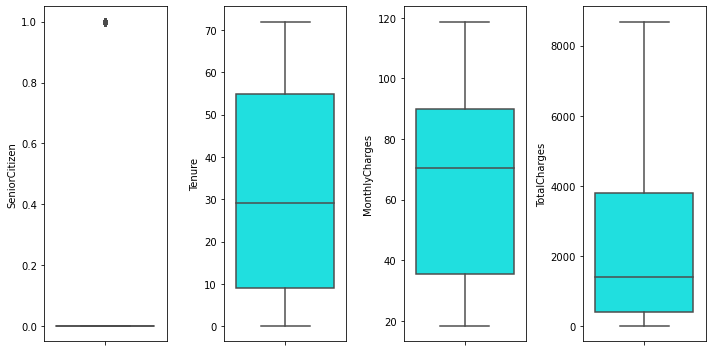

In [20]:
# adjust the figure size for better readability
plt.figure(figsize=(10,5))

# plotting
features = numerical
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='cyan')
    plt.tight_layout()

In [21]:
df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [22]:
df[df['SeniorCitizen']==1]['CustomerID'].count()/df['CustomerID'].count()*100

16.21468124378816

Obervation:
* There is one outlier in the `SeniorCitizen` column (value = 1) due to high frequency in value 0. Since it is boolean/binary column (value 0 or 1) , no need to handle.
* There is no outlier in `Tenure`, `MonthlyCharges`, and `TotalCharges` column.
* 16% of customers is Senior Citizen.

/Users/macos/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/macos/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/macos/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

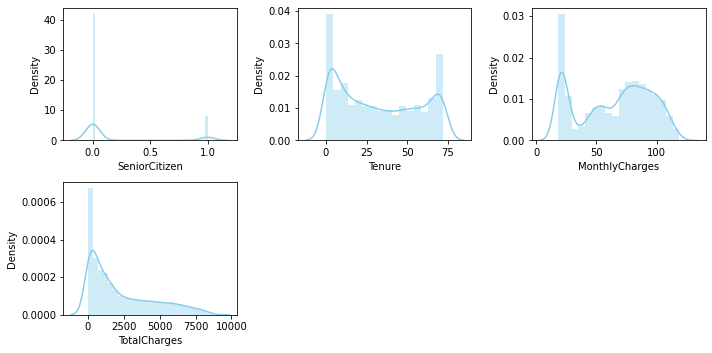

In [23]:
# adjust the figure size for better readability
plt.figure(figsize=(10,5))

features = numerical
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    sns.distplot(x=df[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

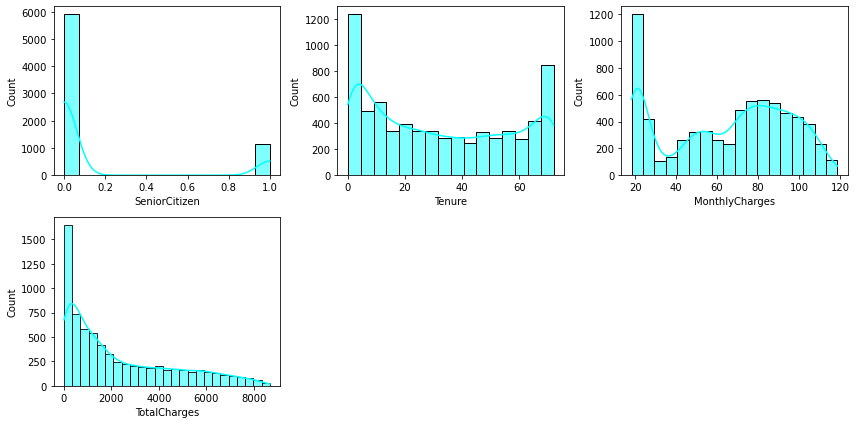

In [24]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

features = numerical
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    sns.histplot(x=df[features[i]], color='cyan', kde=True)
    plt.xlabel(features[i])
    plt.tight_layout()

In [25]:
# check distribution peak for every column in numerical
for i in df[numerical].columns:
    x = df[numerical][i].mode()
    print(i)
    print(x,'\n')

SeniorCitizen
0    0
Name: SeniorCitizen, dtype: int64 

Tenure
0    1
Name: Tenure, dtype: int64 

MonthlyCharges
0    20.05
Name: MonthlyCharges, dtype: float64 

TotalCharges
0     0.0
1    20.2
Name: TotalCharges, dtype: float64 



Observation:
* In terms of the target variable, `SeniorCitizen = 0` is more frequent in the dataset. But, the imbalance condition is NOT severe (still OK).
* Most customer has distribution peak `Tenure = 1 month`, `MonthlyCharges ~ 20`, `TotalCharges ~ 20`.
* `Tenure` column has U-shape distribution, `MonthlyCharges` column has bimodal distribution, `TotalCharges` column has J-shape distribution.
* The highest number of customers have a short term tenure. And also a high number of customers has a long term tenure.


## Multivariate Analysis

In [26]:
df.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<AxesSubplot:xlabel='Tenure', ylabel='Count'>

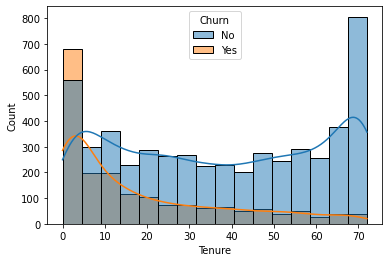

In [27]:
sns.histplot(data=df,
            x='Tenure',
            hue='Churn', alpha=0.5, kde=True)

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

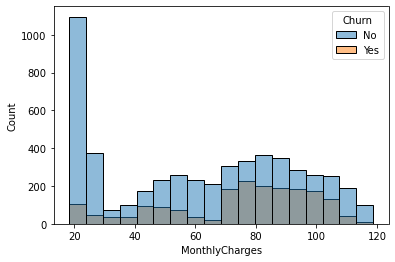

In [28]:
sns.histplot(data=df,
            x='MonthlyCharges',
            hue='Churn', alpha=0.5)

<AxesSubplot:xlabel='Contract', ylabel='count'>

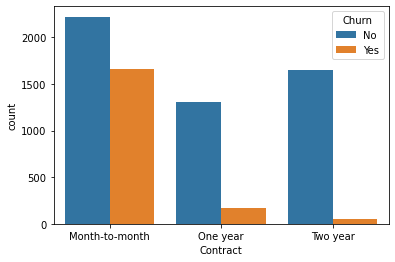

In [29]:
sns.countplot(data = df, x = 'Contract', hue = 'Churn')

Observation:

* The churn rate decreases as the tenure increase. Good maintain for long time customer.
* Churn rate among customers use very cheap plans in monthly charges is low. And churn rate among high spender customer is high (70 - 100 USD).
* Most churn customers purchased a short term month-to-month contract.


In [30]:
# check if change string value to integer

check_df = df.replace({'Male':1, 'Female':2, 'Yes':1, 'No': 0, 'No internet service' : 0, 'No phone service':0}, regex=True)

check_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7043 non-null   object 
 1   Gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int64  


In [31]:
check_df.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,2,0,1,0,1,0,0,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,0,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,2,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


<AxesSubplot:>

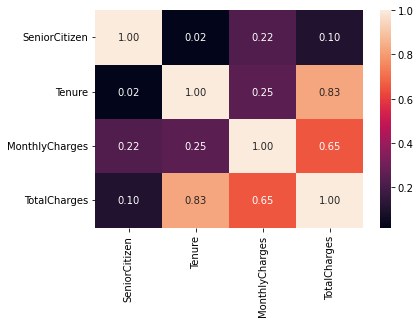

In [32]:
# correlation heatmap df
correlation = df.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

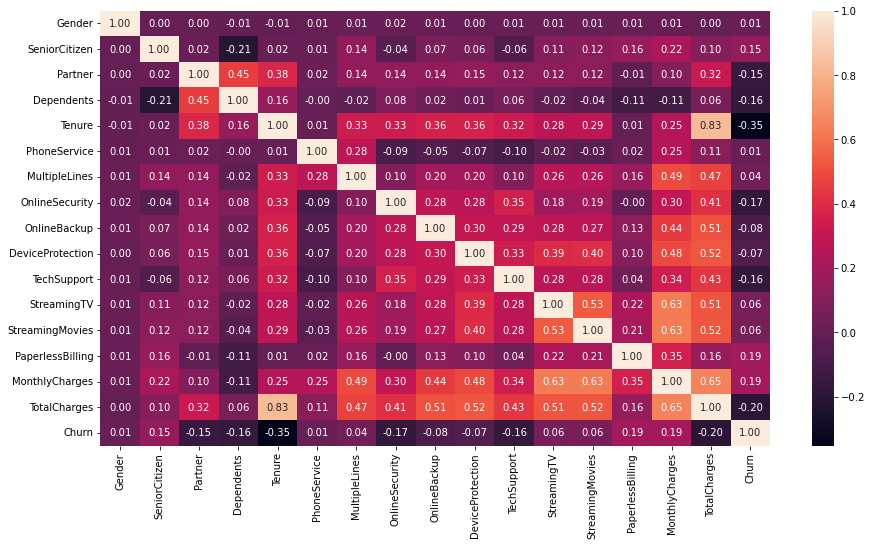

In [33]:
# correlation heatmap check_df
plt.figure(figsize=(15,8))

correlation2 = check_df.corr()
sns.heatmap(correlation2, annot=True, fmt='.2f')
plt.show()

Observation :

* There is a positive correlation between `TotalCharges`, `MonthlyCharges`, `StreamingTV`, `StreamingMovies`
* `Tenure` and `TotalCharges` are highly correlated each other
* Low correlation for other columns

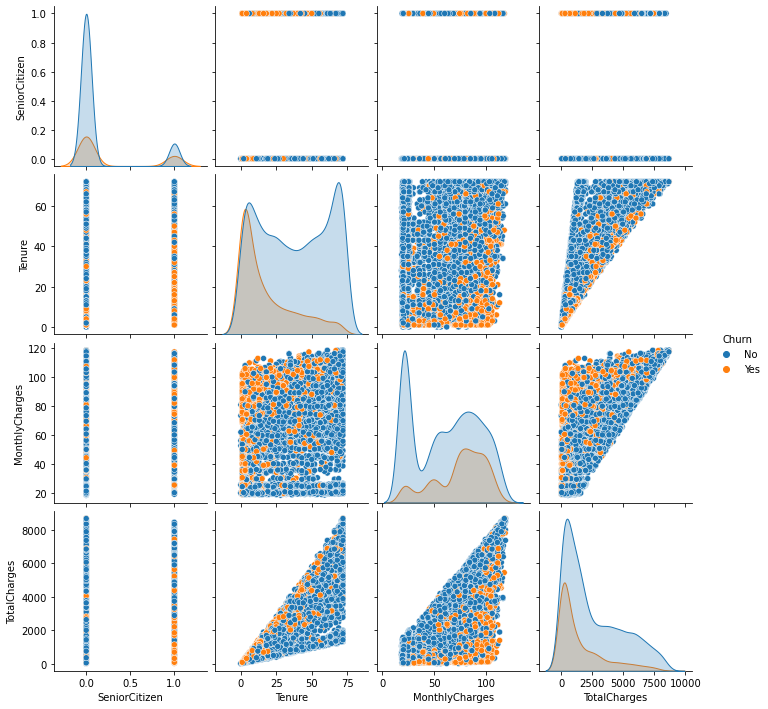

In [34]:
sns.pairplot(df, hue='Churn')

Observation:

* The churn rate decreases as the tenure increase. Good maintain for long time customer
* Higher monthly charges tend to have higher churn percentage
* The higher total charges there is a decrease churn percentage. It makes sense long time customer has higher `TotalCharges` and long time customer has lower churn percentage.

## Conclusion
1. The data does not contain major issues. There are only 11 NULL values, no duplicated rows and no odd values. We drop null values due to small in proportion (< 5%) and `Churn` = No.
2. Overall, the minimum and maximum values make sense for each column.
3. Most columns appear to be object/nominal data that has contain 2 or more than 2 values (Female/Male, Yes/No/other, others).
4. `TotalCharges` dtypes is inappropriate. It has been changed to float64.
5. All of the columns with continuous numerical values are not symmetric.
6. Most of the customers has a phone service (90%).
7. 73% of the customers is not churn.
8. From the boxplot we can see outlier in `SeniorCitizen` column. But it makes sense, because it is binary (0 and 1). the outlier is at "1", and it's possible (no need to drop)
9. From histogram plot of `Tenure` and `Churn` column, we can say that the churn rate decreases as the tenure increase. Good maintain for long time customer.
10. Churn rate among customers use very cheap plans in monthly charges is low. And churn rate among high spender customer is high (70 - 100 USD).
11. Most churn customers purchased a short term month-to-month contract.
12. Tenure and contract duration seems to be strong factors for churn
13. From correlation heatmap: We can see that `Tenure` and `TotalCharges` are highly correlated each other.
14. From pairplot: We can see that higher monthly charges tend to have higher churn percentage

# Deep Dive Exploration

## EDA Questions

1. What is average tenure for customer who is Churn and month-to-month contract type? How much monthly charge loss from customer who is churn?
2. What is top 5 services subscribed by staying customer?
3. What is top 5 services not subscribed by churn customer?

## Question 1 

In [35]:
df.groupby(['Churn','Contract']).agg(
    Avg_Tenure = ('Tenure','mean'),
    Total_Monthly = ('MonthlyCharges','sum')
)

Avg_Tenure  Total_Monthly
Churn Contract                                 
No    Month-to-month   21.033333      136447.05
      One year         41.674063       81698.15
      Two year         56.602914       98840.55
Yes   Month-to-month   14.016918      120847.10
      One year         44.963855       14118.45
      Two year         61.270833        4165.30

In [36]:
df[df['Churn']=='Yes']['MonthlyCharges'].sum()

139130.85

In [37]:
df[df['Churn']=='Yes']['MonthlyCharges'].sum()/df['MonthlyCharges'].sum()*100

30.503351555282137

Observation:
* Average tenure for month-to-month contract type customer tends to churn is about 14 months.
* Monthly charges loss from churn customer is 139130 USD (about 30% from all charges). 

## Question 2

In [38]:
df_no_churn = df.loc[df['Churn'] == 'No'].reset_index(drop=True)
df_churn = df.loc[df['Churn'] == 'Yes'].reset_index(drop=True)

In [39]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

In [40]:
no_churn={}
for a in services:
  x = len(df_no_churn[df_no_churn[a]=='Yes'])
  no_churn[a] = x

df_services_no_churn = pd.DataFrame.from_dict(no_churn, orient='index').reset_index()
df_services_no_churn.columns =['Service', 'Total']
df_services_no_churn.sort_values('Total', ascending=False).reset_index(drop=True).head(5)

,Service,Total
0,PhoneService,4662
1,MultipleLines,2121
2,StreamingMovies,1914
3,OnlineBackup,1906
4,StreamingTV,1893


## Question 3

In [41]:
churn={}
for b in services:
  y = len(df_churn[df_no_churn[b]!='Yes'])
  churn[b] = y

df_services_churn = pd.DataFrame.from_dict(churn, orient='index').reset_index()
df_services_churn.columns =['Service', 'Total']
df_services_churn.sort_values('Total', ascending=False).reset_index(drop=True).head(5)

/var/folders/2s/tpdqlm4d3xs___c61_3ln3280000gn/T/ipykernel_2350/745448333.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y = len(df_churn[df_no_churn[b]!='Yes'])


,Service,Total
0,InternetService,1869
1,OnlineSecurity,1251
2,TechSupport,1239
3,OnlineBackup,1189
4,StreamingTV,1182


From Question 2 and 3, we can conclude to explore more that Online Backup and StreamingTV subscribed by staying customer and not subscribed by churn customer have contribution for determining churn.

## Additional Exploration

In [42]:
df.groupby(['Churn','OnlineBackup','StreamingTV']).agg(
    Average_Tenure = ('Tenure','mean')
).reset_index()

,Churn,OnlineBackup,StreamingTV,Average_Tenure
0,No,No,No,24.430856
1,No,No,Yes,38.121212
2,No,No internet service,No internet service,32.331210
3,No,Yes,No,40.498137
4,No,Yes,Yes,54.441417
5,Yes,No,No,9.672293
6,Yes,No,Yes,19.323755
7,Yes,No internet service,No internet service,8.238938
8,Yes,Yes,No,20.610390
9,Yes,Yes,Yes,37.489726


Observation:
* Staying customer that subscribe online backup and streaming TV has highest average tenure (~ 54 months).
* Churn customer that doesn't subscribe online backup and streaming TV has lowest average tenure. (~ 9 months).
* Provider has to make more campaign for these two factors.